In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#IMPORTING DATASET
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs') 
df=dataset['train'].to_pandas()

#CLEANING THE DATA
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def clean_strings(string_list):
    if pd.notna(string_list):
        return ast.literal_eval(string_list)
    else:
        return string_list
df['job_skills']=df['job_skills'].apply(clean_strings)

In [3]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')]
df__DA_US=df_US.explode('job_skills')
df_DA_US=df_US.dropna(subset=['salary_year_avg'])
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [15]:
df_US_top_demand=df_DA_US_group.sort_values('count', ascending=False).head(10).sort_values('median', ascending=False)
df_US_top_pay=df_DA_US_group.sort_values('median', ascending=False).head(10)

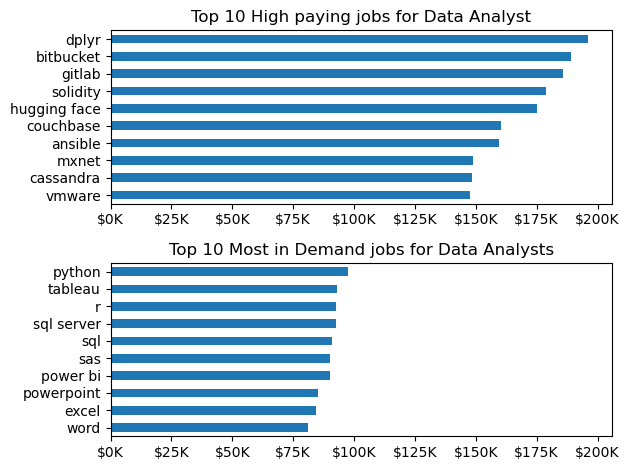

In [29]:
fig, ax=plt.subplots(2,1)
df_US_top_pay.plot(kind='barh', y='median',  ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_title('Top 10 High paying jobs for Data Analyst')
#ax=plt.gca()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

df_US_top_demand.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most in Demand jobs for Data Analysts')
#ax=plt.gca()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
fig.tight_layout()
